In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [22]:
df=pd.read_csv("teleCust1000t.csv",sep=',')
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [23]:
X = df.drop(columns=["custcat"])  
y = df["custcat"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train,y_train)
y_pred = knn_classifier.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.355

In [28]:

accuracy_scores = []
for n in range(1, 100):  
    knn_classifier = KNeighborsClassifier(n_neighbors=n)  # Use n here
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)    
    #

optimal_k = [np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
best_accuracy



0.48

C:\Users\Asus\AppData\Local\Temp\ipykernel_4240\2486896895.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


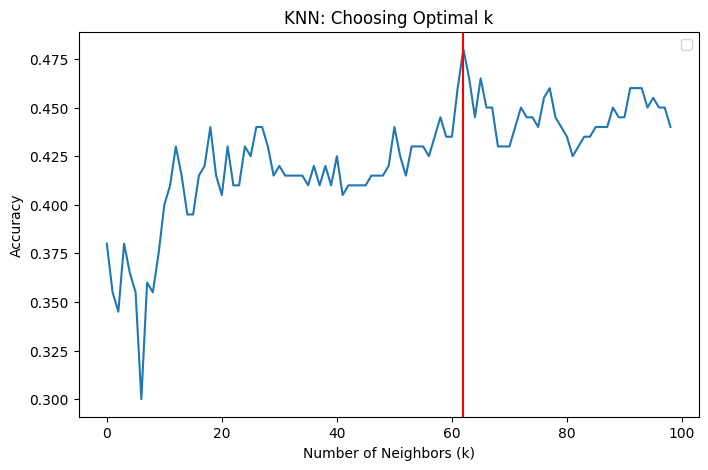

Optimal k: [np.int64(62)] with Highest Accuracy: 0.4800


In [29]:
plt.figure(figsize=(8, 5))
plt.plot( accuracy_scores)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: Choosing Optimal k")
plt.axvline(optimal_k, color='r')
plt.legend()
plt.show()

print(f"Optimal k: {optimal_k} with Highest Accuracy: {best_accuracy:.4f}")